# Explicação sobre Regressão Linear

- Regressão linear é uma técnica estatística usada para modelar a relação entre uma variável dependente \( y \) e uma ou mais variáveis independentes \( x \). O objetivo é encontrar a melhor linha reta (ou hiperplano em dimensões superiores) que minimize a diferença entre os valores previstos e os valores reais.

- Os coeficientes do modelo de regressão linear indicam a relação entre cada feature e a variável dependente. Um coeficiente positivo sugere que, à medida que a feature aumenta, o valor previsto também aumenta, enquanto um coeficiente negativo sugere que, à medida que a feature aumenta, o valor previsto diminui.

## Forma Básica da Regressão Linear

A forma básica da regressão linear é:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

Onde:

- \( y \) é a variável dependente
- \( x_1, x_2, ..., x_n \) são as variáveis independentes
- \( \beta_0 \) é o intercepto
- \( \beta_1, \beta_2, ..., \beta_n \) são os coeficientes (ou pesos)
- \( \epsilon \) é o termo de erro

## Equação Normal

A equação normal é um método para encontrar os coeficientes da regressão linear de forma analítica. A fórmula é:

$$
\beta = (X^T X)^{-1} X^T y
$$

Onde:

- \( \beta \) é o vetor de coeficientes
- \( X \) é a matriz de features (incluindo uma coluna de 1's para o intercepto)
- \( y \) é o vetor de variáveis dependentes
- \( X^T \) denota a transposta da matriz \( X \)
- \( (X^T X)^{-1} \) denota a inversa da matriz \( X^T X \)





## Feature Engeneering
A ideia de engenharia de features (ou feature engineering) é o processo de transformar e criar novas variáveis (features) a partir dos dados brutos, com o objetivo de melhorar a performance dos modelos de machine learning. Essa etapa é fundamental porque as características utilizadas em um modelo podem ter um impacto significativo nos resultados obtidos. Aqui estão os principais objetivos e práticas envolvidas na engenharia de features:

### Objetivos da Engenharia de Features:

- Melhorar o Desempenho do Modelo: Criar features que capturem melhor a relação entre as variáveis independentes e a variável dependente pode levar a modelos mais precisos.

- Reduzir a Dimensionalidade: Ao criar novas features que sintetizam informações relevantes, é possível reduzir a quantidade de dados, mantendo a informação importante.

- Facilitar a Interpretação: Algumas transformações podem tornar os dados mais compreensíveis, ajudando a entender como diferentes variáveis afetam o resultado.

- Capturar Relações Não Lineares: Criar interações ou aplicar transformações (como logaritmos) pode ajudar a modelar relações complexas que não são lineares.

# 1. Dado uma regressão linear, encontre os pesos

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Gerar dados sintéticos
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X, y)

# Identificar os pesos (coeficientes) e o intercepto
print("Coeficientes (pesos):", model.coef_)
print("Intercepto:", model.intercept_)

# Usando a equação normal para comparação
X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
beta_normal = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

print("\nCoeficientes (equação normal):", beta_normal[1:])
print("Intercepto (equação normal):", beta_normal[0])
# INTERCEPTO = BETA_NORMAL[0] seria o valor de y quando todas as variáveis são 0

Coeficientes (pesos): [28.2045949  75.05077568 17.75449804]
Intercepto: 0.012492515759104705

Coeficientes (equação normal): [28.2045949  75.05077568 17.75449804]
Intercepto (equação normal): 0.012492515759110479


# 2. Dado um dataset, como você monta feature engineering?

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Carregar o dataset California Housing
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Este exemplo demonstra várias técnicas de feature engineering:

# Criação de novas features (BEDROOM_PER_ROOM)
# Transformação logarítmica (LOG_POPULATION)
# Binning (INCOME_CATEGORY)
# One-hot encoding para variáveis categóricas
# Criação de features polinomiais
# Dado um gráfico monte uma regressão linear:

# Criar um DataFrame para facilitar a manipulação
df = pd.DataFrame(X, columns=housing.feature_names)
df['PRICE'] = y

# 1. Criar interações entre features
df['BEDROOM_PER_ROOM'] = df['AveBedrms'] / df['AveRooms']

# 2. Transformação logarítmica para melhorar a distribuição
df['LOG_POPULATION'] = np.log1p(df['Population'])

# 3. Binning (discretização)
df['INCOME_CATEGORY'] = pd.qcut(df['MedInc'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# 4. One-hot encoding para variáveis categóricas
# Convertendo a variável categórica em uma matriz de 0s e 1s para melhorar a performance do modelo
df_encoded = pd.get_dummies(df, columns=['INCOME_CATEGORY'], drop_first=True)

# 5. Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['MedInc', 'AveRooms']])
poly_feature_names = poly.get_feature_names_out(['MedInc', 'AveRooms'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combinar todas as features
X_engineered = pd.concat([df_encoded.drop('PRICE', axis=1), df_poly], axis=1)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_engineered, df['PRICE'], test_size=0.2, random_state=42)

# Padronizar as features (normaliza)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizar as features mais importantes
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': abs(model.coef_)})
print(feature_importance.sort_values('importance', ascending=False).head(10))

# Montar a equacao final com cada coeficiente
print("Equação final:")
for coef, feature in zip(model.coef_, X_train.columns):
    print(f"{coef:.2f} * {feature} + ", end="")


Mean Squared Error: 0.5163763669547294
                        feature  importance
6                      Latitude    0.810174
7                     Longitude    0.795994
0                        MedInc    0.723719
14                       MedInc    0.723719
16                     MedInc^2    0.481712
8              BEDROOM_PER_ROOM    0.278227
1                      HouseAge    0.140682
12  INCOME_CATEGORY_Medium-High    0.117603
17              MedInc AveRooms    0.094574
11       INCOME_CATEGORY_Medium    0.075076
Equação final:
0.72 * MedInc + 0.14 * HouseAge + 0.07 * AveRooms + 0.01 * AveBedrms + -0.00 * Population + -0.04 * AveOccup + -0.81 * Latitude + -0.80 * Longitude + 0.28 * BEDROOM_PER_ROOM + -0.01 * LOG_POPULATION + -0.05 * INCOME_CATEGORY_Medium-Low + -0.08 * INCOME_CATEGORY_Medium + -0.12 * INCOME_CATEGORY_Medium-High + -0.06 * INCOME_CATEGORY_High + 0.72 * MedInc + 0.07 * AveRooms + -0.48 * MedInc^2 + -0.09 * MedInc AveRooms + -0.03 * AveRooms^2 + 

# 3.  Dado um gráfico, crie uma regressão linear:

Text(0.5, 1.0, 'Dados de Dispersão e Regressão Linear')

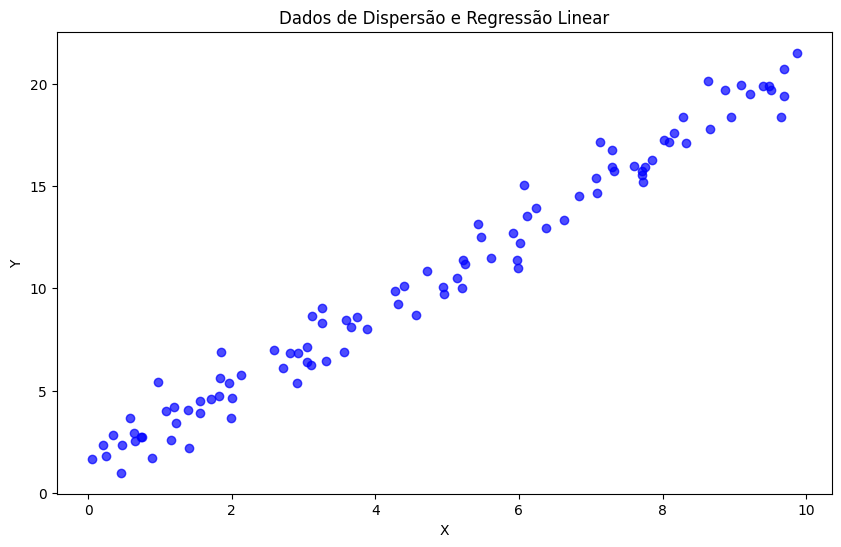

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cria um array de 100 números aleatórios entre 0 e 10 
# e adiciona um ruído 
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados de Dispersão e Regressão Linear')

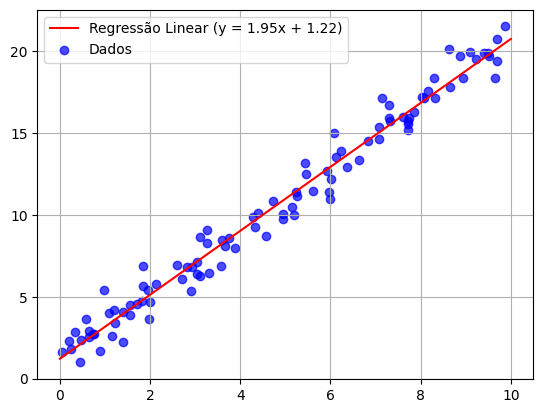

Coeficiente: 1.95
Intercepto: 1.22
Equação da reta: y = 1.95x + 1.22


In [11]:
#Pode ser necessário normalizar os dados no X e/ou Y
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

# Ajustar a regressão linear
model = LinearRegression()
model.fit(X, y)

# Plotar a linha de regressão
X_line = np.array([[0], [10]])
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', label=f'Regressão Linear (y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f})')
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente: {model.coef_[0][0]:.2f}")
print(f"Intercepto: {model.intercept_[0]:.2f}")
print(f"Equação da reta: y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}")